In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
import seaborn as sns
from datetime import date
from string import punctuation

nltk.download('punkt')

## modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def tokenize(phrase):
    '''
    Returns the length of an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = phrase.split()
    return len(tokens)

In [3]:
trump_tweets = pd.read_csv("trump_tweets.csv")
print("Some Trump tweets")
print(trump_tweets.head())
print("")
biden_tweets = pd.read_csv("biden_tweets.csv")
print("Some Biden tweets")
print(biden_tweets.head())

Some Trump tweets
   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols': 

In [4]:
# Add the number of words in each tweet to the Biden and Trump data frames

# Biden

biden_word_counts_list = []
for tweet in biden_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    biden_word_counts_list.append(tweet_length)
biden_tweets["words"] = biden_word_counts_list

# Trump

trump_word_counts_list = []
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)
trump_tweets["words"] = trump_word_counts_list

In [5]:
# Convert the Tweet dates to a usable format for the analysis

print("Before fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

# Biden
biden_tweets["created_at"] = pd.to_datetime(biden_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
biden_tweets['date']=biden_tweets['created_at'].dt.date
biden_tweetsbyday = biden_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

# Trump
trump_tweets["created_at"] = pd.to_datetime(trump_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
trump_tweets['date']=trump_tweets['created_at'].dt.date
trump_tweetsbyday=trump_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

print("After fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

# Source for Biden and Trump tweets by day: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

Before fixing the type, the dates have the type: <class 'str'>
After fixing the type, the dates have the type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
# Check to see if the conversion preserved the date in the order we expect

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("Biden most recent tweet's year according to Python: " + str(biden_tweets["created_at"][0].year))
print("Biden most recent tweet's month according to Python: " + str(biden_tweets["created_at"][0].month))
print("Biden most recent tweet's day according to Python: " + str(biden_tweets["created_at"][0].day))
print("It appears the conversion was successful")

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
Biden most recent tweet's year according to Python: 2020
Biden most recent tweet's month according to Python: 10
Biden most recent tweet's day according to Python: 7
It appears the conversion was successful


In [7]:
# Check to see if we can determine how many days pass between two dates

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("The oldest tweet we have from Biden was tweeted on: " + 
      str(biden_tweets["created_at"][len(biden_tweets["created_at"])-1]))
test_start = biden_tweets["created_at"][len(biden_tweets["created_at"])-1]
test_end = biden_tweets["created_at"][0]
test_start_date = date(test_start.year, test_start.month, test_start.day)
test_end_date = date(test_end.year, test_end.month, test_end.day)
delta = test_end_date - test_start_date
print("Biden's tweets span " + str(delta.days) + " days")
print("2020 is a leap year with 366 days, so the result above is correct.")

# Source: https://www.w3resource.com/python-exercises/python-basic-exercise-14.php

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
The oldest tweet we have from Biden was tweeted on: 2019-10-16 02:35:02
Biden's tweets span 357 days
2020 is a leap year with 366 days, so the result above is correct.


In [8]:
# Add a column to the Biden and Trump data frames that shows how many days before the 2020 election each tweet was tweeted

# Start with Biden

biden_days_to_election = np.zeros(len(biden_tweets["created_at"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweets["created_at"])):
    temp_biden_date = biden_tweets["created_at"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweets["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweets.head()))

Updated Biden data frame
   Unnamed: 0                   id  \
0           0  1313663334286323714   
1           1  1313652765319557122   
2           2  1313646473393840128   
3           3  1313641691602202624   
4           4  1313633890289045504   

                                           full_text  \
0                    Please. https://t.co/acHR1Rf8hE   
1  I can’t wait for @KamalaHarris to make history...   
2  Ignore the polls, folks. There’s too much at s...   
3  Think about what it takes for a Black person t...   
4  Look, folks, I'm going to be honest: we'll try...   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 02:12:00   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:30:00   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:05:00   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 00:46:00   
4  {'hashtags': [], 'symbols'

In [9]:
# Let's also add a "days_to_election" column to the Biden tweets by day dataframe

biden_days_to_election = np.zeros(len(biden_tweetsbyday["unique_dates"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweetsbyday["unique_dates"])):
    temp_biden_date = biden_tweetsbyday["unique_dates"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweetsbyday["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               39              34.0
1   2019-11-21               35             348.0
2   2020-10-06               31              28.0
3   2020-03-16               27             232.0
4   2020-03-04               27             244.0


In [10]:
# The results for Biden look good. Let's do the same thing for Trump's tweets

# Update the Trump tweets data frame

trump_days_to_election = np.zeros(len(trump_tweets["created_at"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweets["created_at"])):
    temp_trump_date = trump_tweets["created_at"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweets["days_to_election"] = trump_days_to_election
print("Updated Trump data frame" + "\n" + str(trump_tweets.head()))

Updated Trump data frame
   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols'

In [11]:
# Also update Trump tweets by day

trump_days_to_election = np.zeros(len(trump_tweetsbyday["unique_dates"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweetsbyday["unique_dates"])):
    temp_trump_date = trump_tweetsbyday["unique_dates"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweetsbyday["days_to_election"] = trump_days_to_election
print("Updated Biden data frame" + "\n" + str(trump_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               62              34.0
1   2020-10-07               48              27.0
2   2020-08-25               45              70.0
3   2020-09-08               44              56.0
4   2020-08-26               41              69.0


In [12]:
# Summary stats for the "full_text" column
biden_total_words = 0 # The number of words Biden used across all the Tweets we collected
biden_word_counts_list = [] # A list of the word count for each tweet
for tweet in biden_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    biden_word_counts_list.append(tweet_length)                 
    biden_total_words += tweet_length
print("Biden words tweeted: " + "{:.0f}".format(biden_total_words))
biden_mean_wordcount = np.mean(biden_word_counts_list)
print("Mean number of words in Biden tweets: " + "{:.2f}".format(biden_mean_wordcount))
biden_median_wordcount = np.median(biden_word_counts_list)
print("Median number of words in Biden tweets: " + "{:.2f}".format(biden_median_wordcount))
biden_mode_wordcount = statistics.mode(biden_word_counts_list)
print("Mode number of words in Biden tweets: " + "{:.0f}".format(biden_mode_wordcount))
biden_minimum_words = min(biden_word_counts_list)
print("The least number of words Biden used in a tweet was: " + "{:.0f}".format(biden_minimum_words))
biden_maximum_words = max(biden_word_counts_list)
print("The most number of words Biden used in a tweet was: " + "{:.0f}".format(biden_maximum_words))
biden_stddev_wordcount = np.std(biden_word_counts_list)
print("Standard deviation of number of words in Biden tweets: " + "{:.2f}".format(biden_stddev_wordcount))

Biden words tweeted: 100838
Mean number of words in Biden tweets: 32.70
Median number of words in Biden tweets: 35.00
Mode number of words in Biden tweets: 43
The least number of words Biden used in a tweet was: 1
The most number of words Biden used in a tweet was: 59
Standard deviation of number of words in Biden tweets: 12.75


In [13]:
# Summary stats for the "favourite" column
biden_favorites = biden_tweets["favourite"]
biden_total_favorites = biden_favorites.sum()
print("Biden tweet favorites: " + "{:.0f}".format(biden_total_favorites))
biden_mean_favorites = np.mean(biden_favorites)
print("Mean number of favorites for Biden tweets: " + "{:.2f}".format(biden_mean_favorites))
biden_median_favorites = np.median(biden_favorites)
print("Median number of favorites for Biden tweets: " + "{:.2f}".format(biden_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# biden_mode_favorites = statistics.mode(biden_favorites)
# print("Mode number of favorites in each Biden tweet: " + str(biden_mode_favorites))
biden_minimum_favorites = min(biden_favorites)
print("The least number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_minimum_favorites))
biden_maximum_favorites = max(biden_favorites)
print("The most number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_maximum_favorites))
biden_stddev_favorites = np.std(biden_favorites)
print("Standard deviation of number of favorites for Biden tweets: " + "{:.2f}".format(biden_stddev_favorites))

Biden tweet favorites: 146530712
Mean number of favorites for Biden tweets: 47513.20
Median number of favorites for Biden tweets: 19678.50
The least number of favorites a Biden tweet received was: 34
The most number of favorites a Biden tweet received was: 1890801
Standard deviation of number of favorites for Biden tweets: 92504.77


In [14]:
# Summary stats for the "retweets" column
biden_retweets = biden_tweets["retweets"]
biden_total_retweets = biden_retweets.sum()
print("Biden retweets: " + "{:.0f}".format(biden_total_retweets))
biden_mean_retweets = np.mean(biden_retweets)
print("Mean number of retweets for Biden tweets: " + "{:.2f}".format(biden_mean_retweets))
biden_median_retweets = np.median(biden_retweets)
print("Median number of retweets for Biden tweets: " + "{:.2f}".format(biden_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# biden_mode_retweets = statistics.mode(biden_retweets)
# print("Mode number of retweets in each Biden tweet: " + str(biden_mode_retweets))
biden_minimum_retweets = min(biden_retweets)
print("The least number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_minimum_retweets))
biden_maximum_retweets = max(biden_retweets)
print("The most number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_maximum_retweets))
biden_stddev_retweets = np.std(biden_retweets)
print("Standard deviation of number of retweets for each Biden tweet: " + "{:.2f}".format(biden_stddev_retweets))

Biden retweets: 27712385
Mean number of retweets for Biden tweets: 8985.86
Median number of retweets for Biden tweets: 4409.00
The least number of retweets a Biden tweet received was: 11
The most number of retweets a Biden tweet received was: 327830
Standard deviation of number of retweets for each Biden tweet: 15350.52


In [15]:
# Statistics for "language" column
biden_language_counts = biden_tweets["language"].value_counts()
print("Raw number of tweets in each language: " + "\n" + str(biden_language_counts))
print("Percent of tweets in each language: " + "\n" + str(100 * biden_language_counts / 
    len(biden_tweets.index))) # Percentage breakdown of each language

Raw number of tweets in each language: 
en     3055
es       19
und       8
fr        1
ro        1
Name: language, dtype: int64
Percent of tweets in each language: 
en     99.059663
es      0.616083
und     0.259403
fr      0.032425
ro      0.032425
Name: language, dtype: float64


Text(0.5, 0, 'Number of Words')

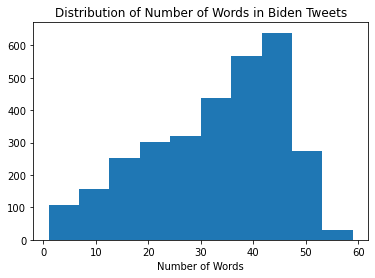

In [16]:
# Number of words

plt.hist(biden_word_counts_list)
plt.title("Distribution of Number of Words in Biden Tweets")
plt.xlabel("Number of Words")

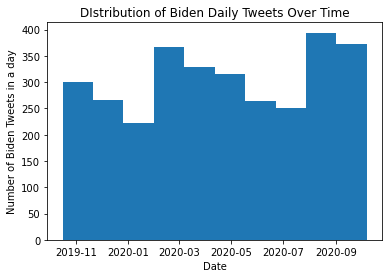

In [17]:
# Tweets per day

plt.hist(biden_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of Biden Tweets in a day')
plt.title("DIstribution of Biden Daily Tweets Over Time")
plt.show()

Text(0.5, 0, 'Favorites')

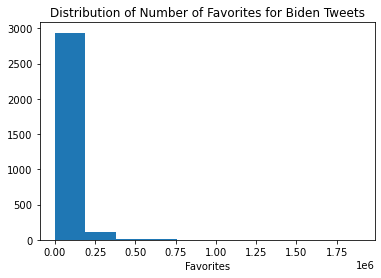

In [18]:
# Favorites

plt.hist(biden_favorites)
plt.title("Distribution of Number of Favorites for Biden Tweets")
plt.xlabel("Favorites")

Text(0.5, 0, 'Favorites')

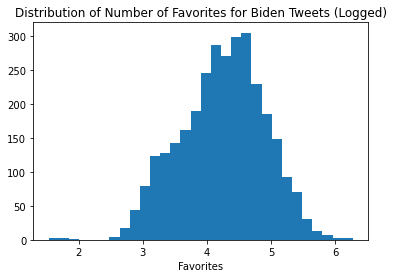

In [19]:
# Favorites logged

biden_favouritelogged=biden_tweets.copy()
biden_favouritelogged['favourite']=np.log10(biden_favouritelogged['favourite'])
plt.hist(biden_favouritelogged["favourite"], bins = 30)
plt.title("Distribution of Number of Favorites for Biden Tweets (Logged)")
plt.xlabel("Favorites")

Text(0.5, 0, 'Number of Retweets')

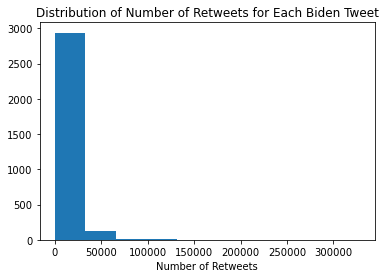

In [20]:
# Retweets

plt.hist(biden_retweets)
plt.title("Distribution of Number of Retweets for Each Biden Tweet")
plt.xlabel("Number of Retweets")

Text(0.5, 0, 'Number of Retweets')

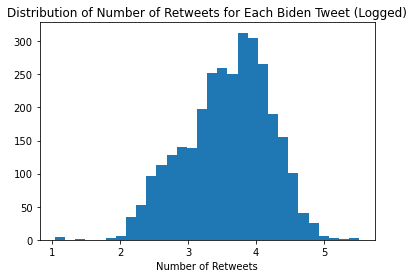

In [21]:
# Retweets logged

biden_retweetslogged=biden_tweets.copy()
biden_retweetslogged['retweets']=np.log10(biden_retweetslogged['retweets'])
plt.hist(biden_retweetslogged["retweets"], bins = 30)
plt.title("Distribution of Number of Retweets for Each Biden Tweet (Logged)")
plt.xlabel("Number of Retweets")

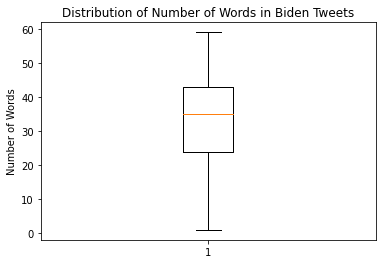

In [22]:
# Number of Words

plt.boxplot(biden_word_counts_list)
plt.title("Distribution of Number of Words in Biden Tweets")
plt.ylabel("Number of Words")
plt.show()

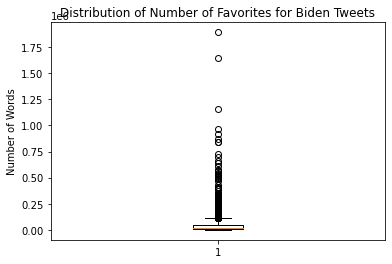

In [23]:
# Favorites

plt.boxplot(biden_favorites)
plt.title("Distribution of Number of Favorites for Biden Tweets")
plt.ylabel("Number of Words")
plt.show()

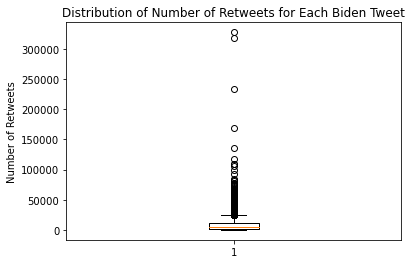

In [24]:
# Retweets

plt.boxplot(biden_retweets)
plt.title("Distribution of Number of Retweets for Each Biden Tweet")
plt.ylabel("Number of Retweets")
plt.show()

Text(0.5, 0, 'Number of Words')

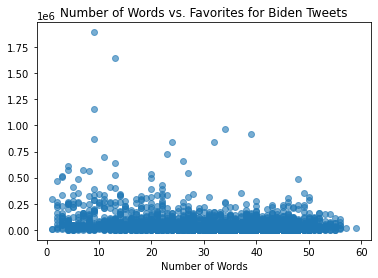

In [25]:
# Number of Words vs. Favorites

plt.scatter(x = biden_word_counts_list, y = biden_favorites, alpha = 0.6)
plt.title("Number of Words vs. Favorites for Biden Tweets")
plt.xlabel("Number of Words")

Text(0.5, 0, 'Number of Words in Tweet')

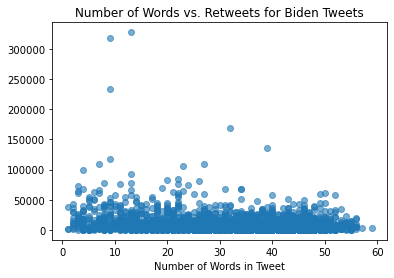

In [26]:
# Number of Words vs. Retweets

plt.scatter(x = biden_word_counts_list, y = biden_retweets, alpha = 0.6)
plt.title("Number of Words vs. Retweets for Biden Tweets")
plt.xlabel("Number of Words in Tweet")

Text(0.5, 0, 'Number of Words in Tweet')

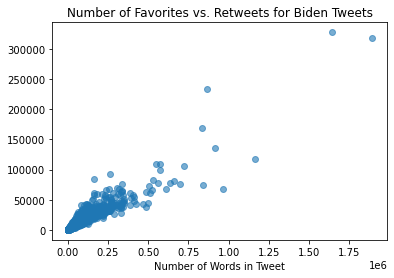

In [27]:
# Number of Favorites vs. Retweets for Biden Tweets

plt.scatter(x = biden_favorites, y = biden_retweets, alpha = 0.6)
plt.title("Number of Favorites vs. Retweets for Biden Tweets")
plt.xlabel("Number of Words in Tweet")

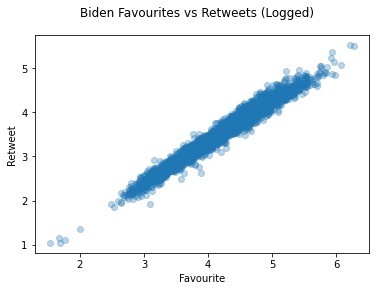

In [28]:
# Logged favorites vs. retweets

plt.scatter(biden_favouritelogged.favourite, biden_retweetslogged.retweets, alpha=0.3)
plt.xlabel('Favourite')
plt.ylabel('Retweet')
plt.suptitle('Biden Favourites vs Retweets (Logged)')
plt.show()

In [29]:
# Summary stats for the full_text column
trump_total_words = 0 # The number of words Trump used across all the Tweets we collected
trump_word_counts_list = [] # A list of the word count for each tweet
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)                 
    trump_total_words += tweet_length
print("Trump words tweeted: " + str(trump_total_words))
trump_mean_wordcount = np.mean(trump_word_counts_list) #Mean number of words in each of Trump's tweets
print("Mean number of words in each Trump tweet: {:.2f}".format(trump_mean_wordcount))
trump_median_wordcount = np.median(trump_word_counts_list)
print("Median number of words in each Trump tweet: {:.2f}".format(trump_median_wordcount))
trump_mode_wordcount = statistics.mode(trump_word_counts_list)
print("Mode number of words in each Trump tweet: {:.2f}".format(trump_mode_wordcount))
trump_minimum_words = min(trump_word_counts_list)
print("The least number of words Trump used in a tweet was: {:.2f}".format(trump_minimum_words))
trump_maximum_words = max(trump_word_counts_list)
print("The most number of words Trump used in a tweet was: {:.2f}".format(trump_maximum_words))
trump_stddev_wordcount = np.std(trump_word_counts_list)
print("Standard deviation of number of words in each Trump tweet: {:.2f}".format(trump_stddev_wordcount))

Trump words tweeted: 33048
Mean number of words in each Trump tweet: 20.57
Median number of words in each Trump tweet: 16.00
Mode number of words in each Trump tweet: 1.00
The least number of words Trump used in a tweet was: 1.00
The most number of words Trump used in a tweet was: 59.00
Standard deviation of number of words in each Trump tweet: 17.83


In [30]:
# Summary stats for the "favourite" column
trump_favorites = trump_tweets["favourite"]
trump_total_favorites = trump_favorites.sum()
print("Trump tweet favorites: {:.2f}".format(trump_total_favorites))
trump_mean_favorites = np.mean(trump_favorites)
print("Mean number of favorites for Trump tweets: {:.2f}".format(trump_mean_favorites))
trump_median_favorites = np.median(trump_favorites)
print("Median number of favorites for Trump tweets: {:.2f}".format(trump_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# trump_mode_favorites = statistics.mode(trump_favorites)
# print("Mode number of favorites in each Trump tweet: " + str(trump_mode_favorites))
trump_minimum_favorites = min(trump_favorites)
print("The least number of favorites a Trump tweet received was: {:.2f}".format(trump_minimum_favorites))
trump_maximum_favorites = max(trump_favorites)
print("The most number of favorites a Trump tweet received was: {:.2f}".format(trump_maximum_favorites))
trump_stddev_favorites = np.std(trump_favorites)
print("Standard deviation of number of retweets for Trump tweets: {:.2f}".format(trump_stddev_favorites))


Trump tweet favorites: 161042301.00
Mean number of favorites for Trump tweets: 100213.01
Median number of favorites for Trump tweets: 74137.00
The least number of favorites a Trump tweet received was: 0.00
The most number of favorites a Trump tweet received was: 1886146.00
Standard deviation of number of retweets for Trump tweets: 98380.33


In [31]:
# Summary stats for the "retweets" column
trump_retweets = trump_tweets["retweets"]
trump_total_retweets = trump_retweets.sum()
print("Trump retweets: " + str(trump_total_retweets))
trump_mean_retweets = np.mean(trump_retweets)
print("Mean number of retweets for Trump tweets: {:.2f}".format(trump_mean_retweets))
trump_median_retweets = np.median(trump_retweets)
print("Median number of retweets for Trump tweets: {:.2f}".format(trump_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# trump_mode_retweets = statistics.mode(trump_retweets)
# print("Mode number of retweets in each Trump tweet: " + str(trump_mode_retweets))
trump_minimum_retweets = min(trump_retweets)
print("The least number of retweets a Trump tweet received was: {:.2f}".format(trump_minimum_retweets))
trump_maximum_retweets = max(trump_retweets)
print("The most number of retweets a Trump tweet received was: {:.2f}".format(trump_maximum_retweets))
trump_stddev_retweets = np.std(trump_retweets)
print("Standard deviation of number of retweets for each Trump tweet: {:.2f}".format(trump_stddev_retweets))

Trump retweets: 37080009
Mean number of retweets for Trump tweets: 23074.06
Median number of retweets for Trump tweets: 18168.00
The least number of retweets a Trump tweet received was: 0.00
The most number of retweets a Trump tweet received was: 416082.00
Standard deviation of number of retweets for each Trump tweet: 19312.65


In [32]:
# Statistics for "language" column

print("Raw number of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts()))
print("Fraction of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts() / 
    len(biden_tweets.index))) # Percentage breakdown of each language

Raw number of tweets in each language: 
en     1248
und     353
fr        3
fa        1
es        1
pt        1
Name: language, dtype: int64
Fraction of tweets in each language: 
en     0.404669
und    0.114462
fr     0.000973
fa     0.000324
es     0.000324
pt     0.000324
Name: language, dtype: float64


Text(0.5, 0, 'Number of Words')

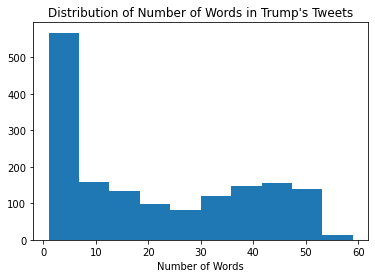

In [33]:
# Number of words

plt.hist(trump_word_counts_list)
plt.title("Distribution of Number of Words in Trump's Tweets")
plt.xlabel("Number of Words")

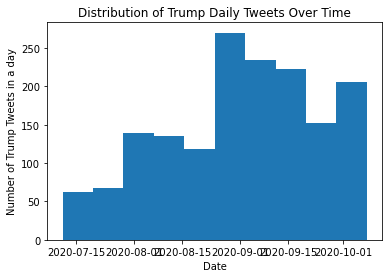

In [34]:
# Tweets per day

plt.hist(trump_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of Trump Tweets in a day')
plt.title("Distribution of Trump Daily Tweets Over Time")
plt.show()

Text(0.5, 0, 'Favorites')

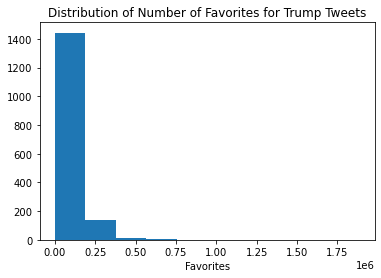

In [35]:
# Favorites

plt.hist(trump_favorites)
plt.title("Distribution of Number of Favorites for Trump Tweets")
plt.xlabel("Favorites")

C:\Users\camde\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\camde\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\camde\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Favorites')

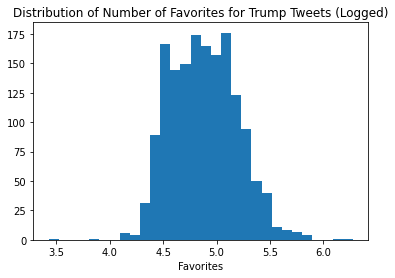

In [36]:
# Favorites logged

trump_favouritelogged=trump_tweets.copy()
trump_favouritelogged['favourite']=np.log10(trump_favouritelogged['favourite'])

trump_favouritelogged=trump_favouritelogged.replace([np.inf, -np.inf], np.nan)

plt.hist(trump_favouritelogged['favourite'], bins = 30)
plt.title("Distribution of Number of Favorites for Trump Tweets (Logged)")
plt.xlabel("Favorites")

Text(0.5, 0, 'Number of Retweets')

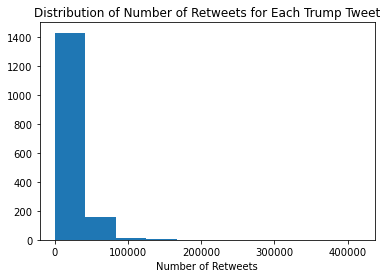

In [37]:
# Retweets

plt.hist(trump_retweets)
plt.title("Distribution of Number of Retweets for Each Trump Tweet")
plt.xlabel("Number of Retweets")

Text(0.5, 0, 'Number of Retweets')

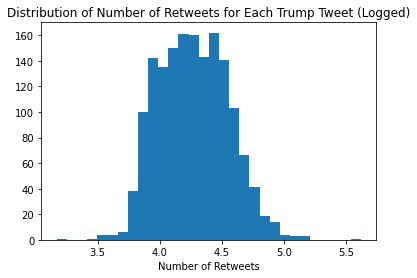

In [38]:
# Retweets logged

trump_retweetslogged=trump_tweets.copy()
trump_retweetslogged['retweets']=np.log10(trump_retweetslogged['retweets'])

trump_retweetslogged=trump_retweetslogged.replace([np.inf, -np.inf], np.nan)

plt.hist(trump_retweetslogged["retweets"], bins = 30)
plt.title("Distribution of Number of Retweets for Each Trump Tweet (Logged)")
plt.xlabel("Number of Retweets")

Text(0, 0.5, 'Number of Words')

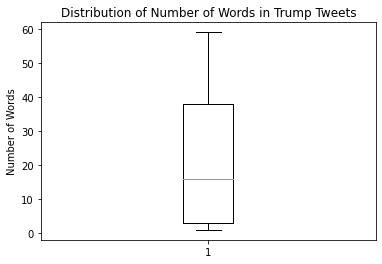

In [39]:
# Number of Words

plt.boxplot(trump_word_counts_list)
plt.title("Distribution of Number of Words in Trump Tweets")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Number of Words')

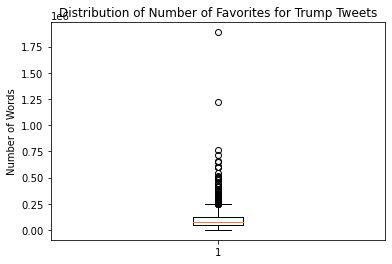

In [40]:
# Favorites

plt.boxplot(trump_favorites)
plt.title("Distribution of Number of Favorites for Trump Tweets")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Number of Retweets')

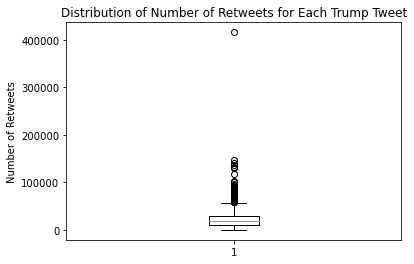

In [41]:
# Retweets

plt.boxplot(trump_retweets)
plt.title("Distribution of Number of Retweets for Each Trump Tweet")
plt.ylabel("Number of Retweets")

Text(0.5, 0, 'Number of Words')

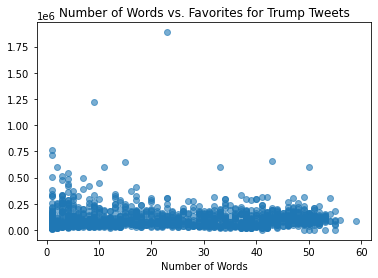

In [42]:
# Number of Words vs. Favorites

plt.scatter(x = trump_word_counts_list, y = trump_favorites, alpha = 0.6)
plt.title("Number of Words vs. Favorites for Trump Tweets")
plt.xlabel("Number of Words")

Text(0.5, 0, 'Number of Words in Tweet')

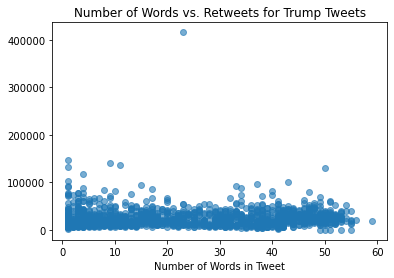

In [43]:
# Number of Words vs. Retweets

plt.scatter(x = trump_word_counts_list, y = trump_retweets, alpha = 0.6)
plt.title("Number of Words vs. Retweets for Trump Tweets")
plt.xlabel("Number of Words in Tweet")

Text(0.5, 0, 'Number of Words in Tweet')

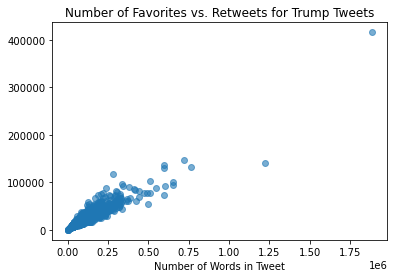

In [44]:
# Number of Favorites vs. Retweets for Trump Tweets

plt.scatter(x = trump_favorites, y = trump_retweets, alpha = 0.6)
plt.title("Number of Favorites vs. Retweets for Trump Tweets")
plt.xlabel("Number of Words in Tweet")

C:\Users\camde\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


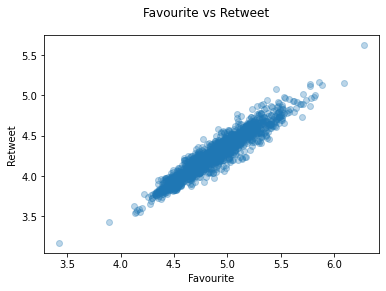

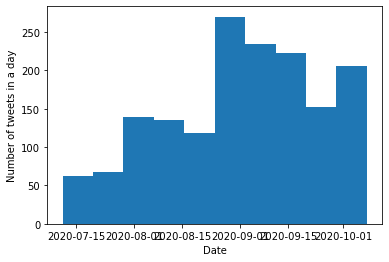

In [45]:
# Number of Favourites vs Retweets for Trump Tweets, logged
favouritelogged=trump_tweets.copy()
retweetslogged=trump_tweets.copy()

favouritelogged['favourite']=np.log10(favouritelogged['favourite'])
retweetslogged['retweets']=np.log10(retweetslogged['retweets'])

plt.scatter(favouritelogged.favourite, retweetslogged.retweets, alpha=0.3)
plt.xlabel('Favourite')
plt.ylabel('Retweet')
plt.suptitle('Favourite vs Retweet')
plt.show()

plt.hist(trump_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of tweets in a day')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  words   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 22 Nov 2020   Prob (F-statistic):            0.00147
Time:                        23:26:51   Log-Likelihood:                -12221.
No. Observations:                3084   AIC:                         2.445e+04
Df Residuals:                    3082   BIC:                         2.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.3277      0.488  

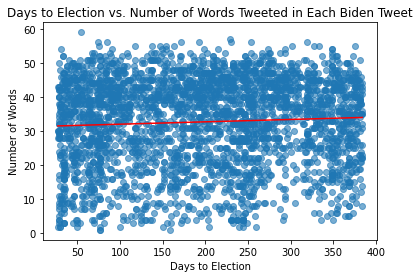

In [46]:
# The updated Trump dataframe looks good as well. Let's begin the analysis, starting with Biden

# Source for t test for linear regression: https://github.com/marcopeix/ISL-linear-regression/blob/master/Linear%20Regression.ipynb

# Biden words vs. days to election

b_days_words_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["words"])
b_days_words_predict = b_days_words_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["words"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_words_predict, c = "red")
plt.title("Days to Election vs. Number of Words Tweeted in Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Words")

b_days_words_est = sm.OLS(biden_tweets["words"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_words_est2 = b_days_words_est.fit()
print(b_days_words_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              favourite   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     458.4
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           6.34e-95
Time:                        23:26:52   Log-Likelihood:                -39428.
No. Observations:                3084   AIC:                         7.886e+04
Df Residuals:                    3082   BIC:                         7.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               1.1e+05   3305.443  

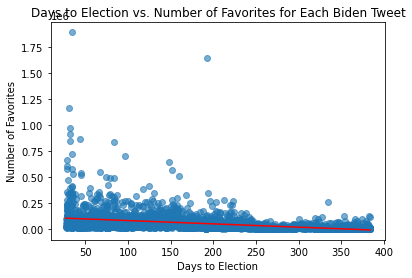

In [47]:
# Biden favorites vs. days to election

b_days_favorites_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["favourite"])
b_days_favorites_predict = b_days_favorites_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["favourite"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_favorites_predict, c = "red")
plt.title("Days to Election vs. Number of Favorites for Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Favorites")

b_days_favorites_est = sm.OLS(biden_tweets["favourite"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_favorites_est2 = b_days_favorites_est.fit()
print(b_days_favorites_est2.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     521.4
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          9.34e-107
Time:                        23:26:52   Log-Likelihood:                -33861.
No. Observations:                3084   AIC:                         6.773e+04
Df Residuals:                    3082   BIC:                         6.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.994e+04    543.698  

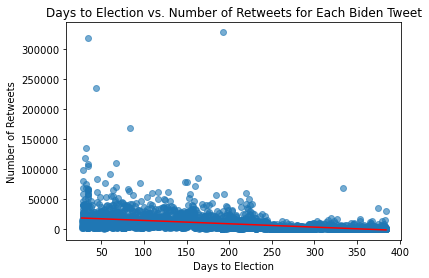

In [48]:
# Biden retweets vs. days to election

b_days_retweets_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["retweets"])
b_days_retweets_predict = b_days_retweets_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["retweets"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_retweets_predict, c = "red")
plt.title("Days to Election vs. Number of Retweets for Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Retweets")

b_days_retweets_est = sm.OLS(biden_tweets["retweets"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_retweets_est2 = b_days_retweets_est.fit()
print(b_days_retweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:        tweets_each_day   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.322
Date:                Sun, 22 Nov 2020   Prob (F-statistic):            0.00416
Time:                        23:26:53   Log-Likelihood:                -1048.5
No. Observations:                 358   AIC:                             2101.
Df Residuals:                     356   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.9903      0.534  

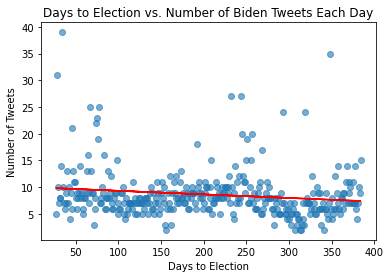

In [49]:
# Biden number of tweets vs. days to election

b_days_tweets_model = linear_model.LinearRegression().fit(biden_tweetsbyday[["days_to_election"]], biden_tweetsbyday["tweets_each_day"])
b_days_tweets_predict = b_days_tweets_model.predict(biden_tweetsbyday[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweetsbyday["days_to_election"], biden_tweetsbyday["tweets_each_day"], alpha = 0.6)
ax.plot(biden_tweetsbyday["days_to_election"], b_days_tweets_predict, c = "red")
plt.title("Days to Election vs. Number of Biden Tweets Each Day")
plt.xlabel("Days to Election")
plt.ylabel("Number of Tweets")

b_days_tweets_est = sm.OLS(biden_tweetsbyday["tweets_each_day"], sm.add_constant(biden_tweetsbyday[["days_to_election"]]))
b_days_tweets_est2 = b_days_tweets_est.fit()
print(b_days_tweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  words   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     38.05
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           8.71e-10
Time:                        23:26:53   Log-Likelihood:                -6891.4
No. Observations:                1607   AIC:                         1.379e+04
Df Residuals:                    1605   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0292      1.298  

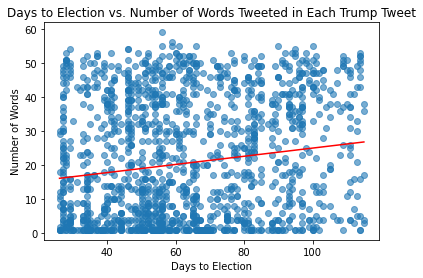

In [50]:
# We will now do the same analysis for Trump's tweets

# Trump words vs. days to election

t_days_words_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["words"])
t_days_words_predict = t_days_words_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["words"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_words_predict, c = "red")
plt.title("Days to Election vs. Number of Words Tweeted in Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Words")

t_days_words_est = sm.OLS(trump_tweets["words"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_words_est2 = t_days_words_est.fit()
print(t_days_words_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              favourite   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02254
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.881
Time:                        23:26:53   Log-Likelihood:                -20755.
No. Observations:                1607   AIC:                         4.151e+04
Df Residuals:                    1605   BIC:                         4.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.012e+05   7247.061  

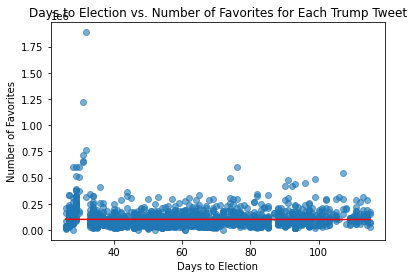

In [51]:
# Trump favorites vs. days to election

t_days_favorites_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["favourite"])
t_days_favorites_predict = t_days_favorites_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["favourite"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_favorites_predict, c = "red")
plt.title("Days to Election vs. Number of Favorites for Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Favorites")

t_days_favorites_est = sm.OLS(trump_tweets["favourite"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_favorites_est2 = t_days_favorites_est.fit()
print(t_days_favorites_est2.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.007887
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.929
Time:                        23:26:54   Log-Likelihood:                -18139.
No. Observations:                1607   AIC:                         3.628e+04
Df Residuals:                    1605   BIC:                         3.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.319e+04   1422.648  

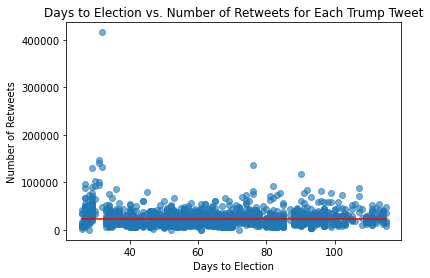

In [52]:
# Trump retweets vs. days to election

t_days_retweets_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["retweets"])
t_days_retweets_predict = t_days_retweets_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["retweets"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_retweets_predict, c = "red")
plt.title("Days to Election vs. Number of Retweets for Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Retweets")

t_days_retweets_est = sm.OLS(trump_tweets["retweets"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_retweets_est2 = t_days_retweets_est.fit()
print(t_days_retweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:        tweets_each_day   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     20.04
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.28e-05
Time:                        23:26:54   Log-Likelihood:                -337.35
No. Observations:                  89   AIC:                             678.7
Df Residuals:                      87   BIC:                             683.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.9269      3.304  

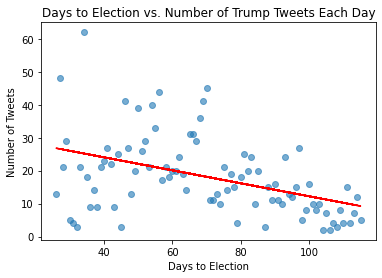

In [53]:
# Trump number of tweets vs. days to election

t_days_tweets_model = linear_model.LinearRegression().fit(trump_tweetsbyday[["days_to_election"]], trump_tweetsbyday["tweets_each_day"])
t_days_tweets_predict = t_days_tweets_model.predict(trump_tweetsbyday[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweetsbyday["days_to_election"], trump_tweetsbyday["tweets_each_day"], alpha = 0.6)
ax.plot(trump_tweetsbyday["days_to_election"], t_days_tweets_predict, c = "red")
plt.title("Days to Election vs. Number of Trump Tweets Each Day")
plt.xlabel("Days to Election")
plt.ylabel("Number of Tweets")

t_days_tweets_est = sm.OLS(trump_tweetsbyday["tweets_each_day"], sm.add_constant(trump_tweetsbyday[["days_to_election"]]))
t_days_tweets_est2 = t_days_tweets_est.fit()
print(t_days_tweets_est2.summary())